In [1]:
import pandas as pd

import re
from wordcloud import WordCloud as wc
from konlpy.tag import Okt
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords

from collections import Counter


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\piai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
dir_path = '../data/'
paths = ['P-GPT_log_EIC기술부_김세현.xlsx','P-GPT_log_에너지조선마케팅실_유태욱.csv','P-GPT_log_재무실_유태욱.csv',
         'P-GPT_log_포항에너지부_황양하.csv','P-GPT_log_포항제강설비부_황양하.csv']

In [4]:
korean_stopwords = '의 가 이 은 들 는 좀 잘 걍 과 도 를 으로 자 에 와 한 하다 고 있다 때문 제 주로 위 1 2 3 4 5 6 7 8 9 0'
with open(dir_path+'stopwords.txt', 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file]


def extract_korean_nouns(text):
    okt = Okt()
    nouns = okt.nouns(text)    
    return nouns


# 불용어 삭제
def remove_korean_stopwords(text):
    stop_words = set(korean_stopwords.split())
    stop_words.update(lines)
    pattern = re.compile(r'^설명.*')
    result = [word for word in text if not pattern.match(word) and word not in stop_words]
    return result


def extract_english_nouns(text):
    tokens = word_tokenize(text)
    nouns = [word for word, pos in pos_tag(tokens) if pos.startswith('N')]
    return nouns


def remove_english_stopwords(text):
    stop_words = set(stopwords.words('english'))
    result = [word for word in text if word.lower() not in stop_words]
    return result


In [5]:
# df_src = pd.read_excel(dir_path+paths[0])  # EIC 기술부
df_src = pd.read_csv(dir_path+paths[1])  # 에너지 조선 마케팅
# df_src = pd.read_csv(dir_path+paths[2])  # 재무
# df_src = pd.read_csv(dir_path+paths[3])  # 에너지부
# df_src = pd.read_csv(dir_path+paths[4])  # 조선 제강 설비

In [6]:
df_src.head()

,Unnamed: 0,CreatedDatetime,UserCode,Department,UserQuestion,Model,ResponseTime,Unnamed: 7
0,429,2023-03-07 6:39,79,에너지조선마케팅실,오늘 저녁 메뉴 추천해줘,gpt-3.5,8,1
1,439,2023-03-07 6:40,79,에너지조선마케팅실,포만감이 높으면서 칼로리는 낮은 한식 추천해줘,gpt-3.5,15,1
2,442,2023-03-07 6:41,79,에너지조선마케팅실,니가 추천해준 메뉴를 잘하는 식당을 알려줘 송파 경찰병원역 근처면 좋아,gpt-3.5,15,1
3,462,2023-03-07 6:47,79,에너지조선마케팅실,주소가 다 같은데 상호명만 다르게 하면 다른 식당이야? 똑바로 안해?,gpt-3.5,8,1
4,494,2023-03-07 6:54,79,에너지조선마케팅실,can you recommend best korean restaurant near ...,gpt-3.5,9,1


In [7]:
df_temp = df_src[['UserCode','UserQuestion','Unnamed: 7']]
df_temp = df_temp.rename(columns={'Unnamed: 7':'라벨'})

In [8]:
df_temp.head()

,UserCode,UserQuestion,라벨
0,79,오늘 저녁 메뉴 추천해줘,1
1,79,포만감이 높으면서 칼로리는 낮은 한식 추천해줘,1
2,79,니가 추천해준 메뉴를 잘하는 식당을 알려줘 송파 경찰병원역 근처면 좋아,1
3,79,주소가 다 같은데 상호명만 다르게 하면 다른 식당이야? 똑바로 안해?,1
4,79,can you recommend best korean restaurant near ...,1


In [9]:
df_temp['Nouns'] = df_temp['UserQuestion'].apply(lambda x:extract_korean_nouns(str(x))+extract_english_nouns(str(x)))
df_temp

,UserCode,UserQuestion,라벨,Nouns
0,79,오늘 저녁 메뉴 추천해줘,1,"[오늘, 저녁, 메뉴, 추천, 저녁, 메뉴, 추천해줘]"
1,79,포만감이 높으면서 칼로리는 낮은 한식 추천해줘,1,"[포만, 감, 칼로리, 한식, 추천, 높으면서, 칼로리는, 낮은, 한식, 추천해줘]"
2,79,니가 추천해준 메뉴를 잘하는 식당을 알려줘 송파 경찰병원역 근처면 좋아,1,"[니, 추천, 메뉴, 식당, 송파, 경찰병원역, 근처, 추천해준, 메뉴를, 잘하는,..."
3,79,주소가 다 같은데 상호명만 다르게 하면 다른 식당이야? 똑바로 안해?,1,"[주소, 상호, 다른, 식당, 똑바로, 안해, 다, 같은데, 상호명만, 다르게, 하..."
4,79,can you recommend best korean restaurant near ...,1,"[restaurant, National, Police, Hospital, Songp..."
...,...,...,...,...
1869,2385,리더로써 업무 비윤리 및 인간존중 등 윤리관련 우수 사항을 작성해주세요.,2,"[리더, 로써, 업무, 비, 윤리, 및, 인간, 존중, 등, 윤리, 관련, 우수, ..."
1870,2642,아래 내용 해석해줘.,4,"[아래, 내용, 해석, 내용, 해석해줘]"
1871,2642,\r\n\r\n\r\n\r\nSl.No.\r\nDocuments\r\nRemark...,2,"[Sl.No, Documents, Estimation, Corrosion, Rate..."
1872,2642,아래 표 내용 해석해줘.\r\n \r\n\r\n\r\n\r\nl.No.\r\nDoc...,4,"[아래, 표, 내용, 해석, 표, 내용, 해석해줘, l.No, Documents, ..."


In [10]:
df_temp = df_temp[df_temp['라벨'].isin([2,3,5])]
df_temp

,UserCode,UserQuestion,라벨,Nouns
14,203,hanseunghyuk@posco.com으로 회의참석 메일 적어죠.2023.03.0...,3,"[회의, 참석, 메일, 호, 결산, 회의, hanseunghyuk, @, posco..."
29,203,Mn 시세를 찾고 싶은데,2,"[시세, Mn, 시세를, 찾고, 싶은데]"
30,203,망간 시세를 찾고싶은데,2,"[망간, 시세, 시세를, 찾고싶은데]"
31,203,런던 금속 거래소에서 망간 가격 찾는 방법 알려죠,2,"[런던, 금속, 거래소, 망간, 가격, 방법, 금속, 거래소에서, 망간, 가격, 찾..."
37,203,스테인리스 304 제작방버,2,"[스테인리스, 제작, 방버, 제작방버]"
...,...,...,...,...
1863,473,▣ 철강협회-중부발전-에넬엑스코리아 철강산업 탄소중립 및 재생에너지 확대를 위한 전...,3,"[철강, 협회, 중부, 발전, 넬, 엑스, 코리아, 철강, 산업, 탄소, 중립, 및..."
1867,2385,그룹장으로써 타의 모범이 되는 사례를 간략하게 작성해주세요.,2,"[그룹, 타의, 모범, 사례, 작성, 타의, 모범이, 되는, 사례를, 간략하게, 작..."
1868,2385,\r\n그룹장으로써 리더십 관점에서 타의 모범이 되는 사례를 간략하게 작성해주세요.,2,"[그룹, 리더십, 관점, 타의, 모범, 사례, 작성, 리더십, 관점에서, 타의, 모..."
1869,2385,리더로써 업무 비윤리 및 인간존중 등 윤리관련 우수 사항을 작성해주세요.,2,"[리더, 로써, 업무, 비, 윤리, 및, 인간, 존중, 등, 윤리, 관련, 우수, ..."


In [11]:
df_temp['Nouns'] = df_temp['Nouns'].apply(lambda x: remove_korean_stopwords(x)+remove_english_stopwords(x))
df_temp

C:\Users\piai\AppData\Local\Temp\ipykernel_10656\3149459001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Nouns'] = df_temp['Nouns'].apply(lambda x: remove_korean_stopwords(x)+remove_english_stopwords(x))


,UserCode,UserQuestion,라벨,Nouns
14,203,hanseunghyuk@posco.com으로 회의참석 메일 적어죠.2023.03.0...,3,"[회의, 참석, 메일, 호, 결산, 회의, hanseunghyuk, @, posco..."
29,203,Mn 시세를 찾고 싶은데,2,"[시세, Mn, 시세를, 찾고, 싶은데, 시세, Mn, 시세를, 찾고, 싶은데]"
30,203,망간 시세를 찾고싶은데,2,"[망간, 시세, 시세를, 찾고싶은데, 망간, 시세, 시세를, 찾고싶은데]"
31,203,런던 금속 거래소에서 망간 가격 찾는 방법 알려죠,2,"[런던, 금속, 거래소, 망간, 가격, 방법, 금속, 거래소에서, 망간, 가격, 찾..."
37,203,스테인리스 304 제작방버,2,"[스테인리스, 제작, 방버, 제작방버, 스테인리스, 제작, 방버, 제작방버]"
...,...,...,...,...
1863,473,▣ 철강협회-중부발전-에넬엑스코리아 철강산업 탄소중립 및 재생에너지 확대를 위한 전...,3,"[철강, 협회, 중부, 발전, 넬, 엑스, 코리아, 철강, 산업, 탄소, 중립, 재..."
1867,2385,그룹장으로써 타의 모범이 되는 사례를 간략하게 작성해주세요.,2,"[그룹, 타의, 모범, 사례, 작성, 타의, 모범이, 되는, 사례를, 간략하게, 작..."
1868,2385,\r\n그룹장으로써 리더십 관점에서 타의 모범이 되는 사례를 간략하게 작성해주세요.,2,"[그룹, 리더십, 관점, 타의, 모범, 사례, 작성, 리더십, 관점에서, 타의, 모..."
1869,2385,리더로써 업무 비윤리 및 인간존중 등 윤리관련 우수 사항을 작성해주세요.,2,"[리더, 업무, 비, 윤리, 인간, 존중, 윤리, 관련, 우수, 사항, 작성, 업무..."


In [12]:
df_temp.groupby('라벨').count()

,UserCode,UserQuestion,Nouns
라벨,,,
2,404,404,404
3,566,566,566
5,28,28,28


In [13]:
df_users_keyword = df_temp.groupby(['UserCode'])['Nouns'].sum()
df_users_keyword

UserCode
79      [포스코, 대해, 알, 내용, 알고, 있는, 내용, 포스코, 대해, 알, 내용, 설...
203     [회의, 참석, 메일, 호, 결산, 회의, hanseunghyuk, @, posco...
279     [공정, 담당자, 긴급, 생산, 요청, 메일, 작성, 긴급생산, 요청하는, 메일, ...
297     [대한민국, 풍력, 타워, 풍력, 타워, 대한민국, 풍력, 타워, 풍력, 타워, 대...
473     [이사회, 인사말, 인사말, 알려줘, 이사회, 인사말, 인사말, 알려줘, 친환경, ...
941     [price, plate, steel, price, plate, steel, 열교환...
965     [소개, 대본, 작성, 대본, 자기, 소개, 대본, 작성, 대본, 광양, 소, 탄소...
1321    [선박, 연료, 유, 종류, 연료유, 종류는, 선박, 연료, 유, 종류, 연료유, ...
1372    [주물, 제품, 종류, 만드는, 제품의, 종류를, 알려줘, 주물, 제품, 종류, 만...
1780    [=, y가, x는, =, y가, x는, =, y가, x는, =, 에서, y가, x...
2227    [difference, s355kl, s355kt, difference, s355k...
2384    [친환경, 강재, 위원회, 참석, 내빈, 대상, 위원회, 회장, 인사말, 참석하는,...
2385    [친환경, 에너지, 강재, 위원회, 이사회, 의장, 인사말, 격식, 작성, 이사회,...
2457    [포스코, 몇개, 몇개야, 포스코, 고로, 몇개, 고로, 몇개야, 몇개, POSCO...
2557    [선박, 엔진, 시장, 점유, 율, 대해, 시장, 점유율에, 알려주세요, 선박, 엔...
2624    [풍력발전, 용, 소재, 판매, 확대, 위햇, 활동, 요, 소재, 판매, 확대를, ...
2630    [고객, 체결, 시, 인사, 감사, 말, 안내, 부탁, MOU, 체결시, 인사, 감...
2642 

In [14]:
df_temp_2 = df_temp[df_temp['라벨'] == 2]
df2 = df_temp_2.groupby(['UserCode'])['Nouns'].sum()
df2

UserCode
79      [포스코, 대해, 알, 내용, 알고, 있는, 내용, 포스코, 대해, 알, 내용, 설...
203     [시세, Mn, 시세를, 찾고, 싶은데, 시세, Mn, 시세를, 찾고, 싶은데, 망...
279     [철강, 후판, 생산, 공정은, 후판의, 생산, 공정은, 것이, 있습니까, 철강, ...
297     [대한민국, 풍력, 타워, 풍력, 타워, 대한민국, 풍력, 타워, 풍력, 타워, 대...
473     [이사회, 인사말, 인사말, 알려줘, 이사회, 인사말, 인사말, 알려줘, 재난, 관...
941     [price, plate, steel, price, plate, steel, 열교환...
965     [광양, 소, 탄소강, 후판, 날판, 평균, 실수, 율, 대로, 유지, 게, 실수,...
1321    [선박, 연료, 유, 종류, 연료유, 종류는, 선박, 연료, 유, 종류, 연료유, ...
1372    [주물, 제품, 종류, 만드는, 제품의, 종류를, 알려줘, 주물, 제품, 종류, 만...
1780    [=, y가, x는, =, y가, x는, =, y가, x는, =, 에서, y가, x...
2227    [difference, s355kl, s355kt, difference, s355k...
2384           [rust, zinc, coating, rust, zinc, coating]
2385    [module, Frame, development, contents, module,...
2457    [포스코, 몇개, 몇개야, 포스코, 고로, 몇개, 고로, 몇개야, 몇개, POSCO...
2557    [선박, 엔진, 시장, 점유, 율, 대해, 시장, 점유율에, 알려주세요, 선박, 엔...
2624    [풍력발전, 용, 소재, 판매, 확대, 위햇, 활동, 요, 소재, 판매, 확대를, ...
2630    [이란, CBAM이란, 무엇인가요, 이란, 무엇, CBAM이란, 무엇인가요, 시계,...
2642 

In [15]:
df_temp_3 = df_temp[df_temp['라벨'] == 3]
df3 = df_temp_3.groupby(['UserCode'])['Nouns'].sum()
df3

UserCode
79      [친환경, 강재, 위원회, 회장, 인사말, 줄, 정도, 작성, 강재, 위원회, 회장...
203     [회의, 참석, 메일, 호, 결산, 회의, hanseunghyuk, @, posco...
279     [공정, 담당자, 긴급, 생산, 요청, 메일, 작성, 긴급생산, 요청하는, 메일, ...
297     [탄소, 중립, 대해, ppt로, 만들어줘, 탄소, 중립, 대해, 로, 대해서, p...
473     [친환경, 이사회, 개회, 인사말, 작성, 개회식, 인사말, 작성해줘, 친환경, 이...
941     [해외, 고객, 초청, 영어, 이메일, 개략, 영문, 이메일, 초안, 작성, 고객사...
965     [소개, 대본, 작성, 대본, 자기, 소개, 대본, 작성, 대본, 원래, 전량, 수...
1780    [냉천, 범람, 포스코, 피해, 대응, 대한, 소감, 포스코, 피해대응에, 대한, ...
2384    [친환경, 강재, 위원회, 참석, 내빈, 대상, 위원회, 회장, 인사말, 참석하는,...
2385    [친환경, 에너지, 강재, 위원회, 이사회, 의장, 인사말, 격식, 작성, 이사회,...
2557    [대우조선, 해양, 포스코, 기술, 교류, 회, 인사, 멘트, 작성, 포스코의, 기...
2630    [고객, 체결, 시, 인사, 감사, 말, 안내, 부탁, MOU, 체결시, 인사, 감...
2642    [아래, 내용, 영어, 자연, 번역, 모든, 부서, 모든, 방법, 동원, 톤, 생산...
3147    [회의, 록, 회의록, 만들어줘, 회의, 록, 회의록, 만들어줘, 녹음, 거, 회의...
3253    [report, acquisition, Daewoo, Shipbuilding, Co...
3264    [뉴, 칼라, 이러닝, 워, 벤치, 교재, 확인, 예상, 문제, 개, Level2_...
Name: Nouns, dtype: object

In [16]:
df_temp_5 = df_temp[df_temp['라벨'] == 5]
df5 = df_temp_5.groupby(['UserCode'])['Nouns'].sum()
df5

UserCode
203     [후판, 자동, 매매, 프로그램, 코딩, 자동매매, 프로그램, 코딩해죠, 후판, 자...
279     [엑셀, 중복, 항목, 삭제, 기능사, 용법, 중복된, 항목, 삭제하는, 기능사용법...
965     [문, 처럼, 파이썬, 언어, 기초, 구조, 단어, SQL문에, select, 처럼...
3264    [메일, 확인, 내용, 요약, 기능, 코딩, 확인하고, 내용을, 요약해주는, 기능을...
Name: Nouns, dtype: object

In [17]:
# word_count_dict = {}

# for user_code, words in zip(df_temp['UserCode'], df_temp['Nouns']):
#     if user_code not in word_count_dict:
#         word_count_dict[user_code] = Counter()

#     word_count_dict[user_code].update(words)

# word_count_dict




In [18]:
df_freq = df_temp['UserCode'].value_counts().reset_index()
df_freq.columns = ['UserCode','Frequency']
df_freq

,UserCode,Frequency
0,203,619
1,965,86
2,2385,84
3,297,36
4,79,25
5,1372,17
6,473,17
7,279,14
8,3264,14
9,941,13


In [19]:
df_user = df_temp.groupby('UserCode')['Nouns'].sum().reset_index()
df_user.columns = ['UserCode', 'Nouns']
df_user

,UserCode,Nouns
0,79,"[포스코, 대해, 알, 내용, 알고, 있는, 내용, 포스코, 대해, 알, 내용, 설..."
1,203,"[회의, 참석, 메일, 호, 결산, 회의, hanseunghyuk, @, posco..."
2,279,"[공정, 담당자, 긴급, 생산, 요청, 메일, 작성, 긴급생산, 요청하는, 메일, ..."
3,297,"[대한민국, 풍력, 타워, 풍력, 타워, 대한민국, 풍력, 타워, 풍력, 타워, 대..."
4,473,"[이사회, 인사말, 인사말, 알려줘, 이사회, 인사말, 인사말, 알려줘, 친환경, ..."
5,941,"[price, plate, steel, price, plate, steel, 열교환..."
6,965,"[소개, 대본, 작성, 대본, 자기, 소개, 대본, 작성, 대본, 광양, 소, 탄소..."
7,1321,"[선박, 연료, 유, 종류, 연료유, 종류는, 선박, 연료, 유, 종류, 연료유, ..."
8,1372,"[주물, 제품, 종류, 만드는, 제품의, 종류를, 알려줘, 주물, 제품, 종류, 만..."
9,1780,"[=, y가, x는, =, y가, x는, =, y가, x는, =, 에서, y가, x..."


In [20]:
df_user = pd.merge(df_user,df_freq,on='UserCode')
df_user

,UserCode,Nouns,Frequency
0,79,"[포스코, 대해, 알, 내용, 알고, 있는, 내용, 포스코, 대해, 알, 내용, 설...",25
1,203,"[회의, 참석, 메일, 호, 결산, 회의, hanseunghyuk, @, posco...",619
2,279,"[공정, 담당자, 긴급, 생산, 요청, 메일, 작성, 긴급생산, 요청하는, 메일, ...",14
3,297,"[대한민국, 풍력, 타워, 풍력, 타워, 대한민국, 풍력, 타워, 풍력, 타워, 대...",36
4,473,"[이사회, 인사말, 인사말, 알려줘, 이사회, 인사말, 인사말, 알려줘, 친환경, ...",17
5,941,"[price, plate, steel, price, plate, steel, 열교환...",13
6,965,"[소개, 대본, 작성, 대본, 자기, 소개, 대본, 작성, 대본, 광양, 소, 탄소...",86
7,1321,"[선박, 연료, 유, 종류, 연료유, 종류는, 선박, 연료, 유, 종류, 연료유, ...",12
8,1372,"[주물, 제품, 종류, 만드는, 제품의, 종류를, 알려줘, 주물, 제품, 종류, 만...",17
9,1780,"[=, y가, x는, =, y가, x는, =, y가, x는, =, 에서, y가, x...",12


In [21]:
df_user_rank = df_user.sort_values(by='Frequency',ascending=False)

In [22]:
df_user_rank5 = df_user_rank.head()

In [23]:
df_user_rank5

,UserCode,Nouns,Frequency
1,203,"[회의, 참석, 메일, 호, 결산, 회의, hanseunghyuk, @, posco...",619
6,965,"[소개, 대본, 작성, 대본, 자기, 소개, 대본, 작성, 대본, 광양, 소, 탄소...",86
12,2385,"[친환경, 에너지, 강재, 위원회, 이사회, 의장, 인사말, 격식, 작성, 이사회,...",84
3,297,"[대한민국, 풍력, 타워, 풍력, 타워, 대한민국, 풍력, 타워, 풍력, 타워, 대...",36
0,79,"[포스코, 대해, 알, 내용, 알고, 있는, 내용, 포스코, 대해, 알, 내용, 설...",25


In [24]:
keywords_user = df_user_rank5[df_user_rank5['UserCode'] == 203]['Nouns']

In [25]:
keywords_user = list(keywords_user)[0]

In [26]:
len(keywords_user)

82039

In [27]:
dict_words = dict()

for word in keywords_user:
    if word not in dict_words:
        dict_words[word] = 1
    else:
        dict_words[word] += 1

In [28]:
len(dict_words)

5975

In [29]:
sorted_dict = dict(sorted(dict_words.items(), key=lambda x: x[1], reverse=True))
sorted_dict

{'기술': 1212,
 '강': 942,
 '포스코': 792,
 '내용': 716,
 '메일': 628,
 '탱크': 614,
 '용접': 598,
 '및': 590,
 '설계': 516,
 '수정': 478,
 '아래': 474,
 '회': 462,
 '진행': 450,
 'LNG': 440,
 '개발': 430,
 '당사': 404,
 '고Mn강': 402,
 '후': 390,
 '대한': 380,
 '주': 376,
 '%': 364,
 '적용': 358,
 '자료': 350,
 '확인': 338,
 '공사': 338,
 '고': 336,
 '당진': 316,
 '교류': 308,
 '가스': 300,
 '부장': 296,
 '현황': 292,
 '수': 291,
 '저장': 288,
 '그룹': 282,
 '한국': 282,
 '검토': 274,
 '에너지': 262,
 '일정': 258,
 '재료': 258,
 '프로젝트': 248,
 '위해': 248,
 '고객': 244,
 '시': 244,
 '평가': 244,
 '요청': 242,
 '강재': 238,
 '예정': 236,
 '결과': 234,
 '수주': 234,
 '개선': 228,
 '시장': 222,
 '솔루션': 216,
 '추가': 216,
 '박사': 212,
 '작성': 208,
 '공유': 198,
 '터미널': 196,
 '구축': 192,
 '한승혁': 190,
 '대리': 190,
 '것': 186,
 '소개': 186,
 '지원': 186,
 '답변': 184,
 '마케팅': 182,
 '완료': 180,
 '해외': 178,
 '개최': 176,
 '협의': 176,
 '스마트': 172,
 '등록': 170,
 '수요': 170,
 '산업': 168,
 '조선': 168,
 '안건': 164,
 '계획': 160,
 '김태욱': 160,
 '설명': 158,
 '보고': 158,
 '발표': 158,
 '단계': 158,
 '회의': 154,
 '감사합니다': 15

In [30]:
words_remove = '박형진 한승혁 김태욱 노동환 내용 부장 강 아래 및 포스코'
elements_to_remove = set(words_remove.split())

In [31]:

filtered_dict = {key: value for key, value in dict_words.items() if key not in elements_to_remove}

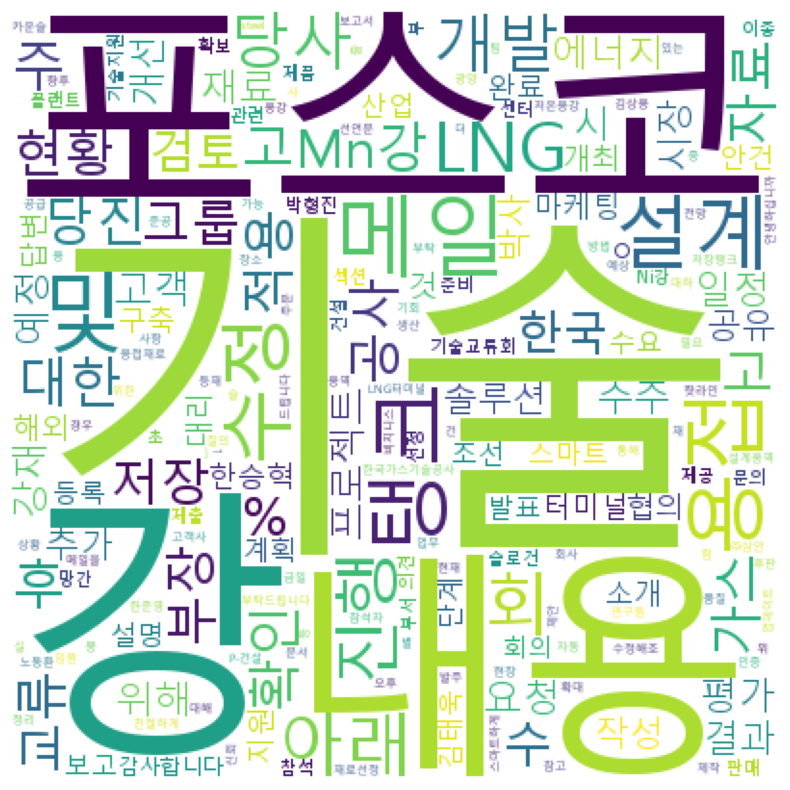

In [32]:
import matplotlib.pyplot as plt
font_path = 'C:\Windows\WinSxS\amd64_microsoft-windows-f..uetype-malgungothic_31bf3856ad364e35_10.0.19041.1_none_bb40ebfb65874170/malgun.ttf' 
my_wc = wc(random_state=123,width=400,height=400,background_color='white',font_path=font_path)
img_wordcloud = my_wc.generate_from_frequencies(dict_words)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

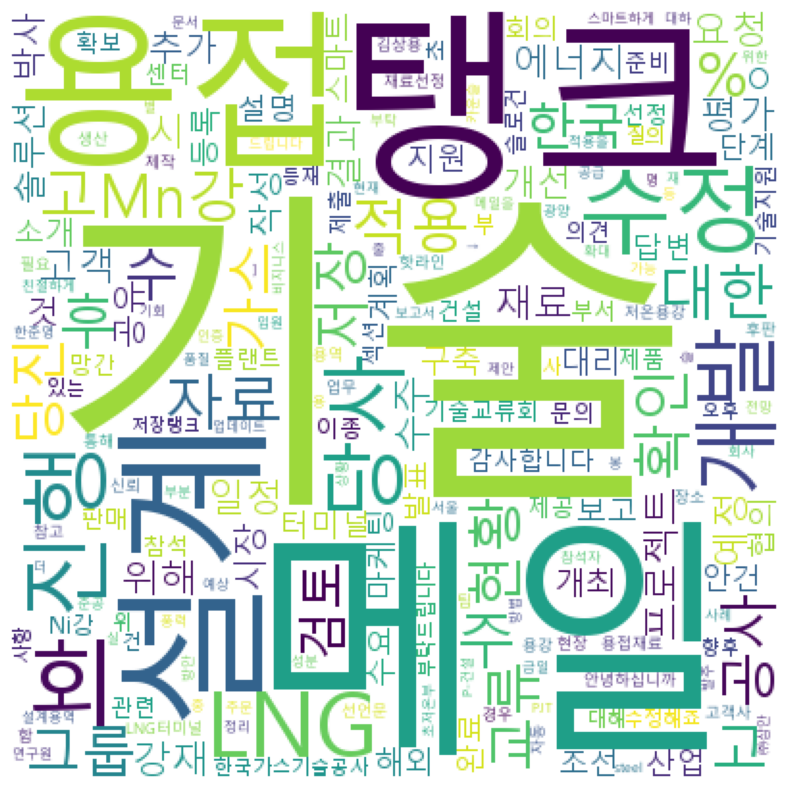

In [33]:
my_wc = wc(random_state=123,width=400,height=400,background_color='white',font_path=font_path)
img_wordcloud = my_wc.generate_from_frequencies(filtered_dict)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

In [34]:
df_temp

,UserCode,UserQuestion,라벨,Nouns
14,203,hanseunghyuk@posco.com으로 회의참석 메일 적어죠.2023.03.0...,3,"[회의, 참석, 메일, 호, 결산, 회의, hanseunghyuk, @, posco..."
29,203,Mn 시세를 찾고 싶은데,2,"[시세, Mn, 시세를, 찾고, 싶은데, 시세, Mn, 시세를, 찾고, 싶은데]"
30,203,망간 시세를 찾고싶은데,2,"[망간, 시세, 시세를, 찾고싶은데, 망간, 시세, 시세를, 찾고싶은데]"
31,203,런던 금속 거래소에서 망간 가격 찾는 방법 알려죠,2,"[런던, 금속, 거래소, 망간, 가격, 방법, 금속, 거래소에서, 망간, 가격, 찾..."
37,203,스테인리스 304 제작방버,2,"[스테인리스, 제작, 방버, 제작방버, 스테인리스, 제작, 방버, 제작방버]"
...,...,...,...,...
1863,473,▣ 철강협회-중부발전-에넬엑스코리아 철강산업 탄소중립 및 재생에너지 확대를 위한 전...,3,"[철강, 협회, 중부, 발전, 넬, 엑스, 코리아, 철강, 산업, 탄소, 중립, 재..."
1867,2385,그룹장으로써 타의 모범이 되는 사례를 간략하게 작성해주세요.,2,"[그룹, 타의, 모범, 사례, 작성, 타의, 모범이, 되는, 사례를, 간략하게, 작..."
1868,2385,\r\n그룹장으로써 리더십 관점에서 타의 모범이 되는 사례를 간략하게 작성해주세요.,2,"[그룹, 리더십, 관점, 타의, 모범, 사례, 작성, 리더십, 관점에서, 타의, 모..."
1869,2385,리더로써 업무 비윤리 및 인간존중 등 윤리관련 우수 사항을 작성해주세요.,2,"[리더, 업무, 비, 윤리, 인간, 존중, 윤리, 관련, 우수, 사항, 작성, 업무..."


In [35]:
user_203_labels_freq = df_temp[df_temp['UserCode'] == 203].groupby('라벨').size().reset_index(name='빈도')
user_203_labels_freq

,라벨,빈도
0,2,163
1,3,439
2,5,17


In [36]:
user_203_labels_freq['percentage'] = (user_203_labels_freq['빈도'] / user_203_labels_freq['빈도'].sum()) * 100

In [37]:
user_203_labels_freq

,라벨,빈도,percentage
0,2,163,26.332795
1,3,439,70.920840
2,5,17,2.746365


In [38]:
# keyword_for_qustions ={'status':set('현황 동향 시세 status current'.split()),
#                        'explanation':set('뜻 설명 mean explain 증명'.split()),
#                        'compare':set('비교 장점 단점 차이'.split()),
#                        'proposal':set('제시 방법 선정 방안'.split())}


# def q_status(text):


SyntaxError: unexpected EOF while parsing (1161198704.py, line 7)

In [39]:
df2_q = df_temp[df_temp['라벨'] == 2][['UserCode','UserQuestion','Nouns']]
df2_q

,UserCode,UserQuestion,Nouns
29,203,Mn 시세를 찾고 싶은데,"[시세, Mn, 시세를, 찾고, 싶은데, 시세, Mn, 시세를, 찾고, 싶은데]"
30,203,망간 시세를 찾고싶은데,"[망간, 시세, 시세를, 찾고싶은데, 망간, 시세, 시세를, 찾고싶은데]"
31,203,런던 금속 거래소에서 망간 가격 찾는 방법 알려죠,"[런던, 금속, 거래소, 망간, 가격, 방법, 금속, 거래소에서, 망간, 가격, 찾..."
37,203,스테인리스 304 제작방버,"[스테인리스, 제작, 방버, 제작방버, 스테인리스, 제작, 방버, 제작방버]"
39,203,316L 성분 및 제조법,"[성분, 제조법, 제조법, 성분, 및, 제조법, 및, 제조법]"
...,...,...,...
1856,965,"날판 설계를 할때 ""매들이"" 라는 단어가 무슨뜻인지 설명해줘","[날판, 설계, 단어, 뜻, 설계를, 매들이, 단어가, 무슨뜻인지, 날판, 설계, ..."
1867,2385,그룹장으로써 타의 모범이 되는 사례를 간략하게 작성해주세요.,"[그룹, 타의, 모범, 사례, 작성, 타의, 모범이, 되는, 사례를, 간략하게, 작..."
1868,2385,\r\n그룹장으로써 리더십 관점에서 타의 모범이 되는 사례를 간략하게 작성해주세요.,"[그룹, 리더십, 관점, 타의, 모범, 사례, 작성, 리더십, 관점에서, 타의, 모..."
1869,2385,리더로써 업무 비윤리 및 인간존중 등 윤리관련 우수 사항을 작성해주세요.,"[리더, 업무, 비, 윤리, 인간, 존중, 윤리, 관련, 우수, 사항, 작성, 업무..."


In [42]:
all_nouns_2 = [noun for nouns_list in df2_q['Nouns'] for noun in nouns_list]
word_frequencies = dict(Counter(all_nouns_2))

word_frequencies

{'시세': 4,
 'Mn': 4,
 '시세를': 4,
 '찾고': 2,
 '싶은데': 10,
 '망간': 12,
 '찾고싶은데': 2,
 '런던': 2,
 '금속': 4,
 '거래소': 2,
 '가격': 20,
 '방법': 28,
 '거래소에서': 2,
 '찾는': 2,
 '알려죠': 10,
 '스테인리스': 2,
 '제작': 10,
 '방버': 2,
 '제작방버': 2,
 '성분': 4,
 '제조법': 4,
 '및': 58,
 '포스코': 68,
 '주식': 4,
 '변동': 4,
 '수치': 2,
 '선행': 4,
 '지표': 8,
 '주식과': 2,
 '변동하는': 2,
 '수치는': 2,
 '선행지표': 2,
 '찾아죠': 14,
 '같이': 1,
 '그리고': 2,
 '주식의': 2,
 '변동지표': 2,
 '선행지표는': 2,
 '모지': 12,
 '모': 6,
 '원자재': 2,
 '주가': 2,
 '상관관계': 8,
 '대하': 24,
 '서술': 4,
 '가격과': 2,
 '주가의': 2,
 '상관관계에': 2,
 '서술하시오': 4,
 '대하여': 11,
 '대해': 42,
 '알': 14,
 '내용': 30,
 '알고': 8,
 '있는': 20,
 '설명': 33,
 '대해서': 16,
 '설명해줘': 7,
 'production': 2,
 'capacity': 2,
 'steel': 28,
 'company': 6,
 'posco': 2,
 '회사': 20,
 '조직': 22,
 '구조': 30,
 '계층': 8,
 '수평': 4,
 '장단점': 2,
 '구조에서': 2,
 '구조와': 2,
 '수평적': 2,
 '구조의': 2,
 '장단점을': 2,
 '기업': 14,
 '시민': 2,
 '는걸': 2,
 '아는걸': 2,
 '설명해주게나': 1,
 '부유': 8,
 '해상': 26,
 '풍력': 62,
 '자료': 22,
 '해상풍력': 12,
 '설명자료': 2,
 '저장': 34,
 '탱크': 50,
 '대한': 98,
 '대한민

In [45]:
dfff = pd.DataFrame(list(word_frequencies.items()), columns=['Word', 'Frequency'])

excel_file_path = "word_frequencies.xlsx"
dfff.to_excel(excel_file_path, index=False)


In [70]:
data_path = '../data/'
filename = 'keywords_2_esm.xlsx'

df_keyword_2 = pd.read_excel(data_path + filename)

df_keyword_2

,words,frequency
0,LNG,80
1,풍력,62
2,터미널,62
3,태양광,60
4,탱크,50
...,...,...
216,Hybrid,2
217,Hydrogen에,2
218,MSDS,2
219,Mill,2


In [73]:
keyword_set = set(df_keyword_2['words'].tolist())
keyword_set

{'A578',
 'BIS20P',
 'BIS20TP',
 'CBAM',
 'CBAM이란',
 'COD',
 'CTOD',
 'DNV',
 'DQT',
 'EN-S275J0AR로',
 'EN-S275J0AR의',
 'EN-S355J0AR',
 'ETF가',
 'FIO',
 'FIO에',
 'HQs',
 'Hybrid',
 'Hydrogen에',
 'LCO2',
 'LNG',
 'LNG저장탱크용',
 'LNG탱크',
 'LNG터미널',
 'LNG터미널별',
 'LR은',
 'LT-F51',
 'LT-FH51',
 'LTFH36',
 'MODULE',
 'MSDS',
 'Mill',
 'Mn',
 'Ni',
 'Ni과',
 'P690',
 'PJT',
 'Pipe',
 'Plate',
 'PosMAC은',
 'PosMac',
 'PosMac3.0과',
 'PosMac과',
 'QT',
 'SAGD',
 'SSAB',
 'SSAB의',
 'STS',
 'STS304',
 'SUS304',
 'Solar',
 'Steel',
 'Strap이',
 'UT',
 'UT검사',
 'V42JPB3은',
 'V42JPB3의',
 'X80',
 'ZM275',
 'Zinc',
 'blast',
 'coil',
 'fabricator',
 'fresnel이',
 'furnaces',
 'heliostat가',
 'hydrogen',
 'lng',
 'lng터미널',
 'manufacture',
 'plate',
 'rust',
 's355kl',
 's355kt',
 'solar',
 'steel',
 'stirling이',
 'surface',
 'tank',
 'tanks',
 'trough가',
 'zinc',
 '가공',
 '가스터빈',
 '가스터빈은',
 '강',
 '강관',
 '강재',
 '강재개발',
 '강재소요량에',
 '강재의',
 '강종',
 '거칠기와',
 '고Mn강',
 '고Mn강의',
 '고Mn강이란',
 '고로',
 '고로가',
 '고망간',
 '고정식해

In [74]:
def keyword_in_question(text_list):
    nouns = set(text_list)
    if len(nouns.intersection(keyword_set)):
        return 1
    else:
        return 0

In [75]:
df2_q['KeywordUsed'] = df2_q['Nouns'].apply(lambda x: keyword_in_question(x))
df2_q

,UserCode,UserQuestion,Nouns,KeywordUsed
29,203,Mn 시세를 찾고 싶은데,"[시세, Mn, 시세를, 찾고, 싶은데, 시세, Mn, 시세를, 찾고, 싶은데]",1
30,203,망간 시세를 찾고싶은데,"[망간, 시세, 시세를, 찾고싶은데, 망간, 시세, 시세를, 찾고싶은데]",1
31,203,런던 금속 거래소에서 망간 가격 찾는 방법 알려죠,"[런던, 금속, 거래소, 망간, 가격, 방법, 금속, 거래소에서, 망간, 가격, 찾...",1
37,203,스테인리스 304 제작방버,"[스테인리스, 제작, 방버, 제작방버, 스테인리스, 제작, 방버, 제작방버]",1
39,203,316L 성분 및 제조법,"[성분, 제조법, 제조법, 성분, 및, 제조법, 및, 제조법]",0
...,...,...,...,...
1856,965,"날판 설계를 할때 ""매들이"" 라는 단어가 무슨뜻인지 설명해줘","[날판, 설계, 단어, 뜻, 설계를, 매들이, 단어가, 무슨뜻인지, 날판, 설계, ...",0
1867,2385,그룹장으로써 타의 모범이 되는 사례를 간략하게 작성해주세요.,"[그룹, 타의, 모범, 사례, 작성, 타의, 모범이, 되는, 사례를, 간략하게, 작...",0
1868,2385,\r\n그룹장으로써 리더십 관점에서 타의 모범이 되는 사례를 간략하게 작성해주세요.,"[그룹, 리더십, 관점, 타의, 모범, 사례, 작성, 리더십, 관점에서, 타의, 모...",0
1869,2385,리더로써 업무 비윤리 및 인간존중 등 윤리관련 우수 사항을 작성해주세요.,"[리더, 업무, 비, 윤리, 인간, 존중, 윤리, 관련, 우수, 사항, 작성, 업무...",0


In [76]:
filtered_df = df2_q[df2_q['Nouns'].apply(lambda nouns: '탱크' in nouns)]
filtered_df.groupby(['UserCode'])['Nouns'].count().reset_index()

,UserCode,Nouns
0,203,15


In [79]:
df = df2_q.groupby('UserCode')['Nouns'].sum().reset_index(name='NounUsed')
df

,UserCode,NounUsed
0,79,"[포스코, 대해, 알, 내용, 알고, 있는, 내용, 포스코, 대해, 알, 내용, 설..."
1,203,"[시세, Mn, 시세를, 찾고, 싶은데, 시세, Mn, 시세를, 찾고, 싶은데, 망..."
2,279,"[철강, 후판, 생산, 공정은, 후판의, 생산, 공정은, 것이, 있습니까, 철강, ..."
3,297,"[대한민국, 풍력, 타워, 풍력, 타워, 대한민국, 풍력, 타워, 풍력, 타워, 대..."
4,473,"[이사회, 인사말, 인사말, 알려줘, 이사회, 인사말, 인사말, 알려줘, 재난, 관..."
5,941,"[price, plate, steel, price, plate, steel, 열교환..."
6,965,"[광양, 소, 탄소강, 후판, 날판, 평균, 실수, 율, 대로, 유지, 게, 실수,..."
7,1321,"[선박, 연료, 유, 종류, 연료유, 종류는, 선박, 연료, 유, 종류, 연료유, ..."
8,1372,"[주물, 제품, 종류, 만드는, 제품의, 종류를, 알려줘, 주물, 제품, 종류, 만..."
9,1780,"[=, y가, x는, =, y가, x는, =, y가, x는, =, 에서, y가, x..."


In [83]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

# 이전에 주어진 데이터프레임에서 NounUsed 열을 사용하여 집합 생성
user_sets = {
    row['UserCode']: set(row['NounUsed']) for _, row in df.iterrows()
}

# 벤 다이어그램 그리기
user_labels = {code: f"UserCode {code}" for code in user_sets.keys()}
venn_labels = {label: len(user_sets[code]) for code, label in user_labels.items()}


plt.title("벤 다이어그램")
plt.show()


KeyError: 'UserCode 79'

In [84]:
df_keyword_2

,words,frequency
0,LNG,80
1,풍력,62
2,터미널,62
3,태양광,60
4,탱크,50
...,...,...
216,Hybrid,2
217,Hydrogen에,2
218,MSDS,2
219,Mill,2


In [92]:
# for word in dict_temp:
#     for idx in range(len(df.columns)):
#         column_name = df.columns[idx]
#         column_data = df.iloc[:,idx]
#         if  word in column_data['NounUsed']:
#             dict_temp[word].append(column_data['UserCode'])

dict_temp = {key:[] for key in df_keyword_2['words'].tolist()}

for idx, row in df.iterrows():
    user_code = row['UserCode']
    nouns_used = row['NounUsed']

    for word, word_list in dict_temp.items():
        if any(term in nouns_used for term in [word]):
            word_list.append(user_code)

# # dict_temp을 활용하여 새로운 데이터프레임 생성
# result_data = {key: value for key, value in dict_temp.items()}
# result_df = pd.DataFrame(result_data)

# # 결과 출력
# print(result_df)
dict_temp


{'LNG': [203],
 '풍력': [203, 297, 2630],
 '터미널': [203],
 '태양광': [79, 2385],
 '탱크': [203],
 '용접': [203],
 '후판': [203, 279, 965, 1321, 1372],
 '강재': [203, 279, 297, 965],
 '철강': [203, 279, 941, 2385],
 'steel': [79, 203, 941, 1372],
 '내식성': [203, 3264],
 '강': [203, 297, 941],
 '타워': [203, 297, 2630],
 '기계': [203, 1372],
 '규격': [279, 965],
 '열처리': [203, 941, 965],
 'tank': [203],
 '제철소': [203],
 '터빈': [297],
 'Solar': [2385, 2642],
 '망간': [203, 297, 3264],
 '해상풍력': [203, 297],
 '저장탱크': [203],
 '고Mn강': [203],
 '저장탱크별': [203],
 '선박': [79, 1321, 2557],
 'EN-S355J0AR': [965],
 'DNV': [203],
 'Plate': [203],
 '패널': [2385],
 '탄소': [1372, 2385],
 'LNG터미널별': [203],
 '탄소강': [965],
 'V42JPB3의': [965],
 'hydrogen': [2385],
 '해상풍력타워': [203],
 '메탄올': [279, 1321],
 '주물': [965, 1372],
 'A578': [203],
 'LNG탱크': [203],
 '태양열': [2642],
 'SSAB의': [1372],
 '풍력타워': [2630],
 'BIS20TP': [965],
 'Mn': [203],
 '성능향상강재': [297],
 'LNG터미널': [203],
 'Steel': [203],
 '니켈': [203],
 '풍력발전': [297, 2624],
 'SUS304': [203],

In [93]:
sorted_dict_temp = dict(sorted(dict_temp.items(), key=lambda x: len(x[1]), reverse=True))
sorted_dict_temp

{'후판': [203, 279, 965, 1321, 1372],
 '강재': [203, 279, 297, 965],
 '철강': [203, 279, 941, 2385],
 'steel': [79, 203, 941, 1372],
 '풍력': [203, 297, 2630],
 '강': [203, 297, 941],
 '타워': [203, 297, 2630],
 '열처리': [203, 941, 965],
 '망간': [203, 297, 3264],
 '선박': [79, 1321, 2557],
 '소재': [79, 2385, 2624],
 '태양광': [79, 2385],
 '내식성': [203, 3264],
 '기계': [203, 1372],
 '규격': [279, 965],
 'Solar': [2385, 2642],
 '해상풍력': [203, 297],
 '탄소': [1372, 2385],
 '메탄올': [279, 1321],
 '주물': [965, 1372],
 '풍력발전': [297, 2624],
 '고망간': [203, 3264],
 'STS304': [203, 3264],
 '해상': [203, 297],
 'PJT': [203, 2385],
 '수소': [203, 2385],
 '조선': [203, 1321],
 '후판의': [279, 1321],
 'LNG': [203],
 '터미널': [203],
 '탱크': [203],
 '용접': [203],
 'tank': [203],
 '제철소': [203],
 '터빈': [297],
 '저장탱크': [203],
 '고Mn강': [203],
 '저장탱크별': [203],
 'EN-S355J0AR': [965],
 'DNV': [203],
 'Plate': [203],
 '패널': [2385],
 'LNG터미널별': [203],
 '탄소강': [965],
 'V42JPB3의': [965],
 'hydrogen': [2385],
 '해상풍력타워': [203],
 'A578': [203],
 'LNG탱크': [203